In [87]:
# all the libraries we will use
import numpy as np
import uncertainties as u
from uncertainties import unumpy
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8)
#%ls

In [88]:
# We need to make a function to parse the uncertinty array and return a matplotlib plot:
def unpack_uFloat_array(xuarray, yuarray):
    # empty lists to condtain the data
    xData = []
    xError = []
    yData = []
    yError = []
    
    # step theough the array and unpack the values
    for i in xuarray:
        xData.append(i.n) # in the uncertinty package "n" takes the value of a ufloat
        xError.append(i.s) # and "s" is the uncertinty
    
    # do the same for the y array
    for i in yuarray:
        yData.append(i.n)
        yError.append(i.s)
        
    return(xData, yData, xError, yError)
    
def uFloat_errorbarr_plot(xuarray, yuarray, marker='.'):
    
    xData, yData, xError, yError = unpack_uFloat_array(xuarray, yuarray)
        
    # return a matplotlib figure.
    return(plt.errorbar(xData, yData, xerr=xError, yerr=yError, fmt = marker))


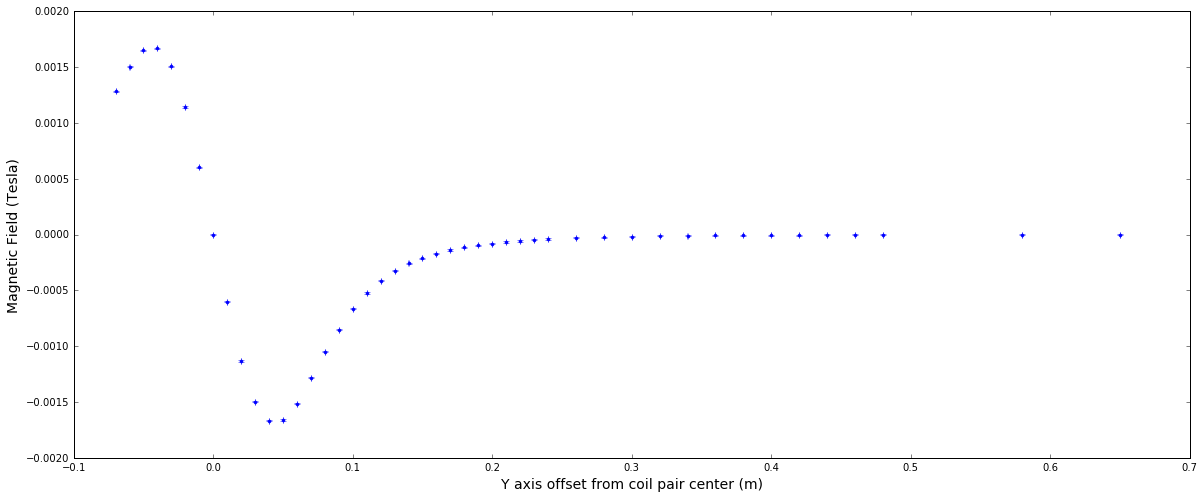

In [89]:
#Quadripole time!
# we need to match our theoretical model for the field with the 
# expereimental data so then we can use the gradent data to specify the magnetic moment. 

quadrapoleRawData = np.genfromtxt('quadFieldY.txt', delimiter=', ', skip_header=True)
#print(quadrapoleFieldData)
yData = unumpy.uarray(quadrapoleRawData[:,0], 0.001) # the distance in cm measured on the lab track holding the mag sensor
yData *= 0.01 # convert to meters 
yData -= 0.15 # and set zero to be at the geometric center of the coil pair
magSensorVoltage = unumpy.uarray(quadrapoleRawData[:,1], 0.005) # raw voltage from the magnetic sensor.

# convert voltage to field ('teslaPerVolt' taken from our calibration data)
teslaPerVolt = u.ufloat(0.0010082, 0.0000005) # (T/V)
quadField = teslaPerVolt * magSensorVoltage # convert the voltage to magnetic field
#print(quadField[-1]) # find the far field limit
quadField -= 5e-5 # set zero field to the far field limit

# plot the data using our prievious unmupy/matplotlib graphing funcitons!
uFloat_errorbarr_plot(yData, quadField)
plt.xlabel('Y axis offset from coil pair center (m)', fontsize=14)
plt.ylabel('Magnetic Field (Tesla)', fontsize=14)
plt.show()

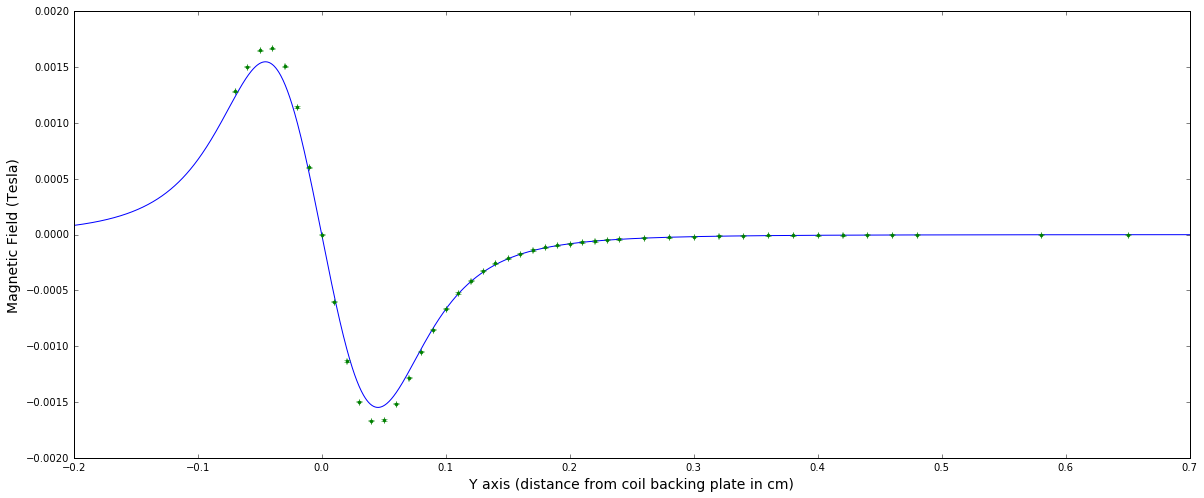

0.650000+/-0.000010 (0+/-5)e-06


In [90]:
# now that we have the experemental data loaded let's compare it with a theoretical model:
# previously we used the single coil aproximation to model the helmholtz configuration of the helmholtz coils

# here is the function we use to calculate B for one coil
def calc_B_theo(listOfYValues, R_x, N=1):
    # Takes a list of y offsets and returns a list of the field at each point
    
    m_0 = 4*np.pi*1.0e-7
    I = 1.50
    bField = []
    for i in range(len(listOfYValues)):
        R_y = listOfYValues[i]
        B = ((m_0*N*I*(R_x**2))/(2*((R_y**2 + R_x**2))**(3/2)))
        bField.append(B)
        
    return(bField)

yTheo = np.linspace(-.20,0.7, 2000) # numpy linspace. We will calculate the theoretical field over its domain.
coilSpacing = .07 # coil spacing in centimeters
coil1 = calc_B_theo(yTheo + (coilSpacing/2), 0.07, N=168)
coil2 = calc_B_theo(yTheo - (coilSpacing/2), 0.07, N=168) # multiply by -1 for a negative current to reverse the field
quadFieldTheo = np.zeros(np.shape(yTheo)) # start with an empty list
for i in range(len(yTheo)): # loop through the array and add the field element by element
    quadFieldTheo[i] = coil1[i] - coil2[i] # actually we want to subtract the second coil to get the quadrapole config
    
# plot the data using our prievious unmupy/matplotlib graphing funcitons!
#plt.plot(yData, quadFieldTheo)
plt.plot(yTheo, quadFieldTheo) #quadFieldTheo)
uFloat_errorbarr_plot(yData, quadField)
plt.xlabel('Y axis (distance from coil backing plate in cm)', fontsize=14)
plt.ylabel('Magnetic Field (Tesla)', fontsize=14)

plt.show()

print(yData[-1], quadField[-1])

gradeent in the center of the quadripole field: 
$$ \frac{db}{d R_y} = h($$